# 3. Chapter

<h1> This Chapter cover</h1>
<ul>
<li>Core components of neural network</li>
<li>An introduction to Keras</li>
<li>Setting up a deep-learning workstation</li>
<li>Using neural networks to solve basic classification and regression problems</li>
</ul>

In [1]:
from keras import layers
from keras import models
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data.shape

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
reverse_word_index

In [ ]:
decoded_review

In [5]:
import numpy as np

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

In [ ]:
results = model.evaluate(x_test, y_test)
results

In [ ]:
history_dic = history.history
history_dic.keys()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
epochs = range(1, 21)


In [ ]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc_values = history_dic['accuracy']
val_acc_values = history_dic['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validadtion Accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3.11 Retraining a model from scratch

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_train[0:3000].shape

In [11]:
history = model.fit(x_train[0:3000], y_train[0:3000], epochs=4, batch_size=512)

Epoch 1/4
6/6 [==============================] - 8s 75ms/step - loss: 0.6639 - accuracy: 0.6123
Epoch 2/4
6/6 [==============================] - 0s 37ms/step - loss: 0.5578 - accuracy: 0.7773
Epoch 3/4
6/6 [==============================] - 0s 36ms/step - loss: 0.4428 - accuracy: 0.9107
Epoch 4/4
6/6 [==============================] - 0s 15ms/step - loss: 0.3755 - accuracy: 0.9283


In [ ]:
results = model.evaluate(x_test, y_test)
results

### 3.4.5 Using a trained network to generate predictions on new data

In [12]:
model.predict(x_test)

782/782 [==============================] - 14s 4ms/step


array([[0.38187805],
       [0.8184507 ],
       [0.7189367 ],
       ...,
       [0.34518373],
       [0.34839723],
       [0.3673788 ]], dtype=float32)

## 3.5.1 The Reuter dataset

#### 3.12 Loading the Reuter dataset

In [13]:
from keras.datasets import reuters

In [14]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000)

2110848/2110848 [==============================] - 0s 0us/step


#### 3.13 Decoding newswires back to text

In [15]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [17]:
train_labels[10]

3

#### 3.14 Encoding the Data

In [18]:
import numpy as np

In [19]:
def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [20]:
x_train = vectorize_sequences(train_data) # vectorized training data
x_test = vectorize_sequences(test_data) # vectorized test data

In [21]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, labels] = 1
  return results

In [22]:
one_hot_train_labels = to_one_hot(train_labels) # vectorized train labels
one_hot_test_labels = to_one_hot(test_labels) # vectorized test labels

In [23]:
from keras.utils.np_utils import to_categorical

In [24]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3.5.3 Build your Network

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [27]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
x_val = x_train[:100]
partial_x_train = x_train[100:]

y_val  = one_hot_test_labels[:100]
partial_y_train = one_hot_train_labels[100:]


In [29]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
18/18 [==============================] - 3s 29ms/step - loss: 2.6091 - accuracy: 0.4550 - val_loss: 2.8828 - val_accuracy: 0.3600
Epoch 2/20
18/18 [==============================] - 0s 14ms/step - loss: 1.6082 - accuracy: 0.6491 - val_loss: 3.3378 - val_accuracy: 0.2700
Epoch 3/20
18/18 [==============================] - 0s 13ms/step - loss: 1.3239 - accuracy: 0.7059 - val_loss: 3.6805 - val_accuracy: 0.2400
Epoch 4/20
18/18 [==============================] - 0s 13ms/step - loss: 1.1528 - accuracy: 0.7434 - val_loss: 3.9024 - val_accuracy: 0.2500
Epoch 5/20
18/18 [==============================] - 0s 12ms/step - loss: 1.0293 - accuracy: 0.7693 - val_loss: 3.9516 - val_accuracy: 0.2400
Epoch 6/20
18/18 [==============================] - 0s 12ms/step - loss: 0.9291 - accuracy: 0.7940 - val_loss: 4.2082 - val_accuracy: 0.2500
Epoch 7/20
18/18 [==============================] - 0s 12ms/step - loss: 0.8528 - accuracy: 0.8053 - val_loss: 4.2446 - val_accuracy: 0.2400
Epoch 8/20
18

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 3.19 Plotting the Training and Validation loss

In [30]:
import matplotlib.pyplot as plt

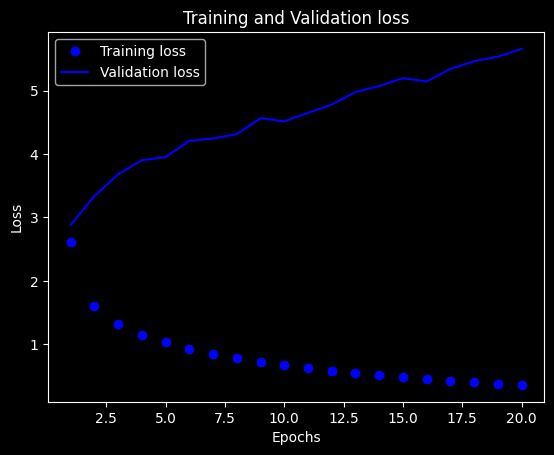

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

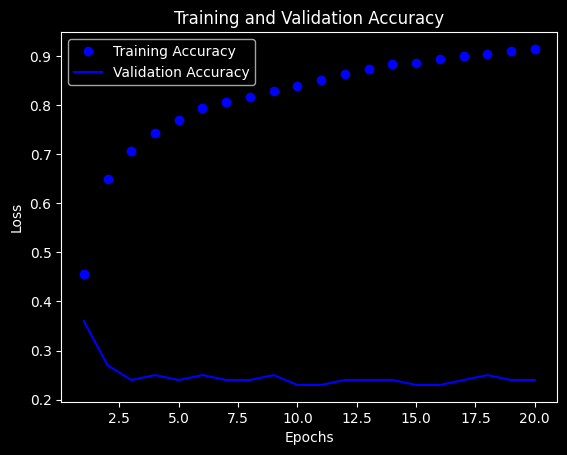

In [43]:
plt.clf() # clear the figure
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 3.21 Retraining a model from scratch

In [44]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/9
18/18 [==============================] - 1s 22ms/step - loss: 2.6473 - accuracy: 0.4713 - val_loss: 2.7895 - val_accuracy: 0.3300
Epoch 2/9
18/18 [==============================] - 0s 11ms/step - loss: 1.6087 - accuracy: 0.6419 - val_loss: 3.2914 - val_accuracy: 0.2900
Epoch 3/9
18/18 [==============================] - 0s 16ms/step - loss: 1.3199 - accuracy: 0.7036 - val_loss: 3.6826 - val_accuracy: 0.2400
Epoch 4/9
18/18 [==============================] - 0s 18ms/step - loss: 1.1582 - accuracy: 0.7370 - val_loss: 3.8999 - val_accuracy: 0.2400
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 1.0420 - accuracy: 0.7676 - val_loss: 4.1245 - val_accuracy: 0.2300
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.9454 - accuracy: 0.7863 - val_loss: 4.3118 - val_accuracy: 0.2400
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.8588 - accuracy: 0.8016 - val_loss: 4.3614 - val_accuracy: 0.2400
Epoch 8/9
18/18 [===

[1.01692533493042, 0.7595725655555725]

In [45]:
import copy

In [46]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hist_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hist_array)) / len(test_labels)

0.1834372217275156

## 3.5.5 Generating prediction o new data

In [47]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [48]:
# Each entry in predictions is a vector of length 46
predictions[0].shape

(46,)

In [49]:
# The coefficients in this vector sum to 1 
np.sum(predictions[0])

0.99999994

In [50]:
# The largest entry is the predical class the class with higest probability
np.argmax(predictions[0])

3

## 3.6.1 The Bostom Housing Price Dataset

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

<p style="font-weight: 100">
As you can see, you have 404 training samples and 102 test samples, each with 13 numerical features. Such as per capita
crime rate, number of rooms per dwelling and so on.
</p>

In [55]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

<p style="font-weight: 100">
The price are typically between $10.000 and $50.000
</p>

In [6]:
print(f'Max: {np.max(train_targets)}')
print(f'Min: {np.min(train_targets)}')

Max: 50.0
Min: 5.0


## 3.6.2 Preparing Data

#### 3.25 Normalizing the Data

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 3.6.3 Build your Network

In [8]:
# you'll need to instantiate the same model multiple times
# if you applied a sigmoid activation function to the last layer, the network only learn to predict values between 0 and 1.
# MSE - Mean Squared Error
# MAE - Mean Absolute Error
def build_model():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

## 3.6.4 Validating your approach using k-fold validation

<p>
K-fold cross-validation consists of splitting the available data into k partitios (typically k = 4 or 5) </br> instantating
k identical models, and training each one on k - 1 partitions while evaluating on the remaining partitions.
</p>

#### 3.27 K-fold validation

In [9]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [70]:
# Prepares the validation data from partition k
for i in range(k):
  print('processing fold # ', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  # Prepares the training data from all others partitions
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

  # Build the Keras Model already compiled
  model = build_model()

  # Trains the model (in silent mode verbose = 0)
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  
  # Evaluate the model on the validation data
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)


processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


In [71]:
all_scores

[2.2702295780181885, 2.602557420730591, 2.457122802734375, 2.5155704021453857]

In [72]:
np.mean(all_scores)

2.461370050907135

#### 3.28 Saving the validation logs at each fold

In [15]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold # ', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1)
  history.history
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

processing fold #  0
Epoch 1/500
303/303 [==============================] - 3s 7ms/step - loss: 233.3603 - mae: 11.7095 - val_loss: 38.9397 - val_mae: 4.0780
Epoch 2/500
303/303 [==============================] - 2s 7ms/step - loss: 31.9750 - mae: 3.8572 - val_loss: 24.6146 - val_mae: 2.9596
Epoch 3/500
303/303 [==============================] - 2s 6ms/step - loss: 22.1642 - mae: 3.0109 - val_loss: 19.8982 - val_mae: 2.8520
Epoch 4/500
303/303 [==============================] - 2s 6ms/step - loss: 18.4546 - mae: 2.8623 - val_loss: 17.7864 - val_mae: 2.5906
Epoch 5/500
303/303 [==============================] - 2s 6ms/step - loss: 16.6147 - mae: 2.6371 - val_loss: 16.4377 - val_mae: 2.8705
Epoch 6/500
303/303 [==============================] - 2s 6ms/step - loss: 13.9700 - mae: 2.5096 - val_loss: 15.6151 - val_mae: 2.3209
Epoch 7/500
303/303 [==============================] - 2s 6ms/step - loss: 13.5551 - mae: 2.4641 - val_loss: 15.1525 - val_mae: 2.4651
Epoch 8/500
303/303 [===========

In [16]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[10.369612216949463,
 3.592572331428528,
 2.9677916169166565,
 2.765354812145233,
 2.5830999612808228,
 2.476022481918335,
 2.363804042339325,
 2.3119805455207825,
 2.2574506998062134,
 2.2145508527755737,
 2.1855305433273315,
 2.1402029395103455,
 2.116878390312195,
 2.0917770862579346,
 2.0526735484600067,
 2.065677523612976,
 2.0250845551490784,
 1.9866158664226532,
 1.9882879257202148,
 1.9512452483177185,
 1.955128163099289,
 1.9045883119106293,
 1.9122377038002014,
 1.8894007205963135,
 1.9138528406620026,
 1.8914108276367188,
 1.8675795197486877,
 1.8452942371368408,
 1.867041677236557,
 1.840433418750763,
 1.8109596073627472,
 1.8145834505558014,
 1.8080527484416962,
 1.804381400346756,
 1.7754518687725067,
 1.7811803221702576,
 1.7610928118228912,
 1.7518961429595947,
 1.7251863777637482,
 1.711307018995285,
 1.7093219757080078,
 1.675233393907547,
 1.682992547750473,
 1.6898359954357147,
 1.6791768968105316,
 1.6700841784477234,
 1.6363603472709656,
 1.6469758450984955,
 1.63

In [17]:
def smoth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [18]:
smooth_mae_history = smoth_curve(average_mae_history[10:])

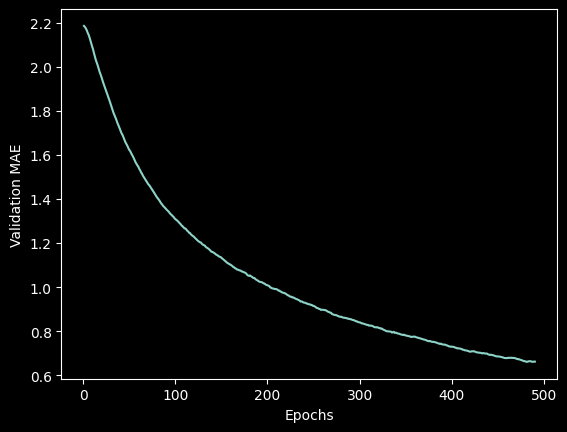

In [21]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [22]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 4ms/step - loss: 20.2083 - mae: 2.7371


2.7370734214782715

In [24]:
print("You're still off by about ${}".format(test_mae_score))

You're still off by about $2.7370734214782715
